<a href="https://colab.research.google.com/github/aparnaattumangalathu/Projects/blob/main/Sentiment_Analysis_on_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('labeledTrainData.tsv',sep='\t')

In [3]:
# Set the option to display the full text content of DataFrame columns

pd.set_option('display.max_colwidth',None)
df.head()


,id,sentiment,review
0,5814_8,1,"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally starts is only on for 20 minutes or so excluding the Smooth Criminal sequence and Joe Pesci is convincing as a psychopathic all powerful drug lord. Why he wants MJ dead so bad is beyond me. Because MJ overheard his plans? Nah, Joe Pesci's character ranted that he wanted people to know it is he who is supplying drugs etc so i dunno, maybe he just hates MJ's music.<br /><br />Lots of cool things in this like MJ turning into a car and a robot and the whole Speed Demon sequence. Also, the director must have had the patience of a saint when it came to filming the kiddy Bad sequence as usually directors hate working with one kid let alone a whole bunch of them performing a complex dance scene.<br /><br />Bottom line, this movie is for people who like MJ on one level or another (which i think is most people). If not, then stay away. It does try and give off a wholesome message and ironically MJ's bestest buddy in this movie is a girl! Michael Jackson is truly one of the most talented people ever to grace this planet but is he guilty? Well, with all the attention i've gave this subject....hmmm well i don't know because people can be different behind closed doors, i know this for a fact. He is either an extremely nice but stupid guy or one of the most sickest liars. I hope he is not the latter."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \""critics\"" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \""critics\"". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \""critics\"" perceive to be its shortcomings."""
2,7759_3,0,"The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwhile some youngsters enter in the restricted area of the security center and are attacked by a pack of large pre-historical animals which are deadlier and bigger . In addition , a security

In [4]:
df.shape

(25000, 3)

In [5]:
df.dtypes

id           object
sentiment     int64
review       object
dtype: object

In [6]:
# Checking for missing values
df.isna().sum()

id           0
sentiment    0
review       0
dtype: int64

In [7]:
# Checking for duplicate values
df.duplicated().sum()

0

In [8]:
#Summary of the dataset
df.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [9]:
df['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

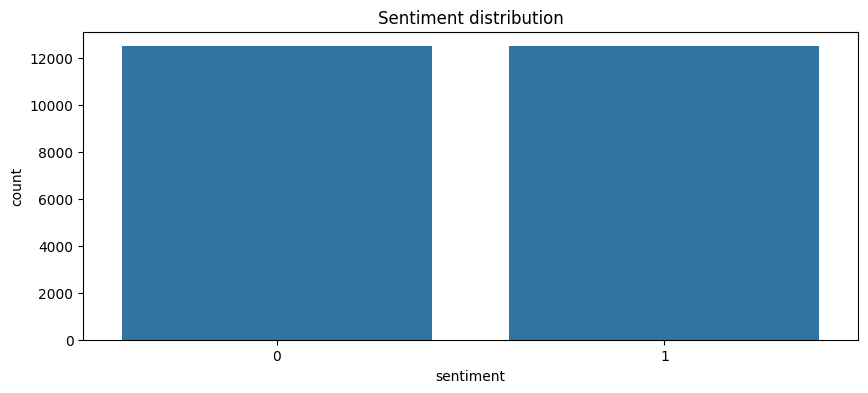

In [10]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="sentiment")
plt.title("Sentiment distribution") # 0 = Negative, 1 = Positive
plt.show()

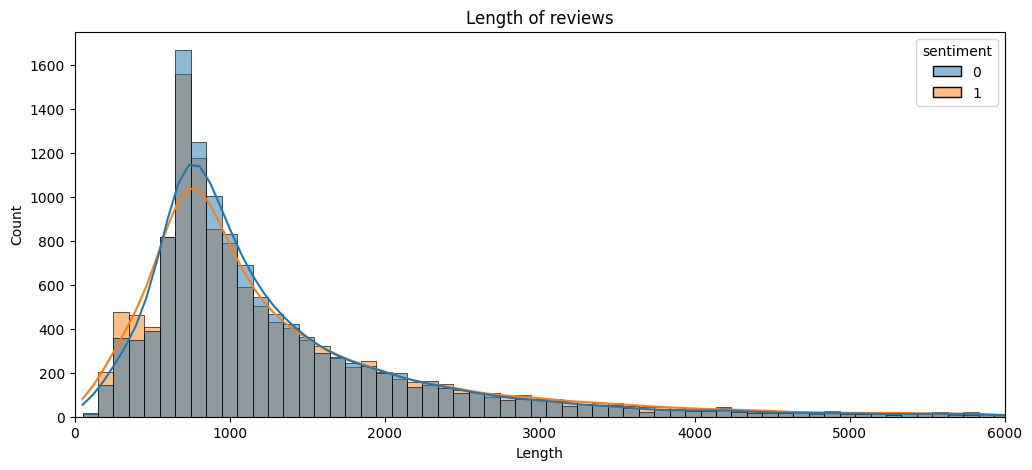

In [11]:
# Calculate length of each review
len_data = pd.concat([df.loc[:,"review"].map(lambda x:len(x)),df.loc[:,"sentiment"]],axis=1)

# Plot distribution
plt.figure(figsize=(12,5))
sns.histplot(data=len_data, x="review", hue="sentiment", binwidth=100, kde=True)
plt.title("Length of reviews")
plt.xlabel("Length")
plt.xlim([0,6000])
plt.show()

In [12]:
import string
import re
def remove_pun(text):
    # Remove punctuation
    text = ''.join([i for i in text if i not in string.punctuation])

    # Remove URL
    text = re.sub(r'http\S+|www\S+|\S+\.com\S+', '', text, flags=re.MULTILINE)

    # Remove tags
    text = re.sub(r'(@\S+)|(#\S+)', r'', text)

    # Remove "RT" from the text
    text = re.sub(r'\bRT\b', r'', text)

    # Remove <br /> or <br/>
    text = re.sub(r'<br\s*/?>', '', text)

    # Remove repeated characters
    return re.sub(r'(.)\1+', r'\1', text)



In [13]:
 # Tokenize the given text into words

import nltk
nltk.download('punkt')
def tokenize(text):
    words = nltk.word_tokenize(text)
    return words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
# Remove stopwords from the given text

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output = [i for i in text if i not in stopwords]
    return output

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stemming(text):
  stem_text = [ps.stem(word) for word in text]
  return stem_text


In [16]:
# Lemmatize each word in the given text

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemm = WordNetLemmatizer()
def lemma(text):
    lemm_text = [wordnet_lemm.lemmatize(word) for word in text]
    return lemm_text


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
def preprocess(df_col):
  corpus = []
  for item in df_col:
    new_item = remove_pun(item)
    new_item = new_item.lower()
    new_item = tokenize(new_item)
    new_item = remove_stopwords(new_item)
    new_item = lemma(new_item)
    corpus.append(' '.join(str(x) for x in new_item))
  return corpus

In [18]:
corpus = preprocess(df['review'])

In [19]:
x = corpus
y = df['sentiment']

In [20]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
x_train

23311                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               movie plain dumbr br casting ralph meker mike hamer fatuous climax film exercise woden predictabilitybr br mike hamer one detective fiction true sociopath unlike marlow spade put piece together solve mystery hame

**Bag-of-Words**

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = "english", min_df = 10, max_df=200, max_features = 2000)

In [23]:
#parse matrix to numpy array to_array
x_train_bow = cv.fit_transform(x_train).toarray()
x_test_bow = cv.transform(x_test).toarray()

In [24]:
print(cv.vocabulary_)

{'ralph': 1412, 'exercise': 632, 'solve': 1655, 'surounding': 1762, 'popcorn': 1328, 'acidentaly': 46, 'continuity': 388, 'tight': 1828, 'lower': 1075, 'leg': 1036, 'pas': 1281, 'grand': 779, 'finale': 685, 'granted': 782, 'text': 1801, 'saint': 1535, 'ace': 39, 'mel': 1121, 'faithful': 661, 'mountain': 1168, 'cash': 285, 'jackson': 954, 'roman': 1515, 'combination': 356, 'statement': 1695, 'thomas': 1813, 'designed': 496, 'program': 1372, 'hype': 887, 'worthles': 1989, 'universe': 1900, 'river': 1505, 'drew': 550, 'spiritual': 1675, 'frustrated': 734, 'southern': 1660, 'california': 260, 'creation': 424, 'driven': 553, 'montana': 1161, 'landscape': 1019, 'lake': 1018, 'wory': 1991, 'inspiring': 923, 'insight': 920, 'goal': 765, 'colour': 354, 'crowd': 432, 'pose': 1335, 'daniel': 457, 'lewis': 1046, 'fot': 718, 'brown': 240, 'learned': 1033, 'paint': 1269, 'loving': 1073, '205': 22, 'rusian': 1529, 'ofensive': 1238, 'symbolism': 1771, 'chalenge': 298, 'setup': 1584, 'conversation': 39

In [25]:
len(cv.vocabulary_)

2000

**TF-IDF**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvec = TfidfVectorizer(stop_words = "english", min_df = 10, max_df=200, max_features = 2000)

In [27]:
#parse matrix to numpy array to_array
x_train_tfidf= tfidfvec.fit_transform(x_train).toarray()
x_test_tfidf = tfidfvec.transform(x_test).toarray()

In [28]:
print(tfidfvec.vocabulary_)

{'ralph': 1412, 'exercise': 632, 'solve': 1655, 'surounding': 1762, 'popcorn': 1328, 'acidentaly': 46, 'continuity': 388, 'tight': 1828, 'lower': 1075, 'leg': 1036, 'pas': 1281, 'grand': 779, 'finale': 685, 'granted': 782, 'text': 1801, 'saint': 1535, 'ace': 39, 'mel': 1121, 'faithful': 661, 'mountain': 1168, 'cash': 285, 'jackson': 954, 'roman': 1515, 'combination': 356, 'statement': 1695, 'thomas': 1813, 'designed': 496, 'program': 1372, 'hype': 887, 'worthles': 1989, 'universe': 1900, 'river': 1505, 'drew': 550, 'spiritual': 1675, 'frustrated': 734, 'southern': 1660, 'california': 260, 'creation': 424, 'driven': 553, 'montana': 1161, 'landscape': 1019, 'lake': 1018, 'wory': 1991, 'inspiring': 923, 'insight': 920, 'goal': 765, 'colour': 354, 'crowd': 432, 'pose': 1335, 'daniel': 457, 'lewis': 1046, 'fot': 718, 'brown': 240, 'learned': 1033, 'paint': 1269, 'loving': 1073, '205': 22, 'rusian': 1529, 'ofensive': 1238, 'symbolism': 1771, 'chalenge': 298, 'setup': 1584, 'conversation': 39

**Word2Vec**

In [39]:
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [41]:
story = []
for doc in df['review']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [42]:
#Model building            by default dimension is 100 in gensim
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [43]:
#building vocabulary
model.build_vocab(story)

In [44]:
#training our model (trained word2vec model)
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(14311702, 15523230)

In [45]:
len(model.wv.index_to_key)

50022

In [46]:
#we created vector for our words, now we will create vector to represent our reviews
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis=0)

In [49]:
document_vector(df['review'].values[0])     #converted reviews to vector with 100 dimension

array([ 0.22794124, -0.28043765,  0.00315298, -0.09225437, -0.20564152,
       -0.58032954, -0.13517386,  0.9568856 ,  0.24062802, -0.39419833,
        0.06824888,  0.14758827, -0.65544236, -0.25951013, -0.19139546,
       -0.0869212 ,  0.6385733 ,  0.13839898, -0.02353606, -1.1517266 ,
        0.5187893 ,  0.160064  ,  0.27555802,  0.07136132, -0.49426743,
        0.02539972,  0.05203354,  0.09482441,  0.46188617,  0.4334201 ,
        0.28836897, -0.3381542 ,  0.04983336, -0.6399294 ,  0.08638439,
       -0.07505576,  0.4113294 , -0.11960907, -0.4215562 ,  0.03621755,
        0.0599046 , -0.11721584,  0.15147719,  0.34459043,  0.6440561 ,
        0.4209737 ,  0.09872518, -0.61240643,  0.6087816 , -0.4350545 ,
       -0.019799  , -0.41497248,  0.20360917,  0.28014508, -0.1718037 ,
        0.09222206,  0.43538466, -0.22440575, -0.37224376, -0.09090935,
       -0.23265693, -0.0329999 ,  0.2638859 , -0.2699363 , -0.8317292 ,
        0.83977324,  0.09129366,  0.14756078, -0.265312  ,  0.28

In [50]:
from tqdm import tqdm

In [51]:
X = []
for doc in tqdm(df['review'].values):
    X.append(document_vector(doc))

100%|██████████| 25000/25000 [11:40<00:00, 35.71it/s]


In [52]:
X = np.array(X)

In [53]:
X.shape

(25000, 100)

In [54]:
X[0]

array([ 0.22794124, -0.28043765,  0.00315298, -0.09225437, -0.20564152,
       -0.58032954, -0.13517386,  0.9568856 ,  0.24062802, -0.39419833,
        0.06824888,  0.14758827, -0.65544236, -0.25951013, -0.19139546,
       -0.0869212 ,  0.6385733 ,  0.13839898, -0.02353606, -1.1517266 ,
        0.5187893 ,  0.160064  ,  0.27555802,  0.07136132, -0.49426743,
        0.02539972,  0.05203354,  0.09482441,  0.46188617,  0.4334201 ,
        0.28836897, -0.3381542 ,  0.04983336, -0.6399294 ,  0.08638439,
       -0.07505576,  0.4113294 , -0.11960907, -0.4215562 ,  0.03621755,
        0.0599046 , -0.11721584,  0.15147719,  0.34459043,  0.6440561 ,
        0.4209737 ,  0.09872518, -0.61240643,  0.6087816 , -0.4350545 ,
       -0.019799  , -0.41497248,  0.20360917,  0.28014508, -0.1718037 ,
        0.09222206,  0.43538466, -0.22440575, -0.37224376, -0.09090935,
       -0.23265693, -0.0329999 ,  0.2638859 , -0.2699363 , -0.8317292 ,
        0.83977324,  0.09129366,  0.14756078, -0.265312  ,  0.28

In [55]:
Y = df['sentiment']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [58]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.825

**Models**

In [59]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [60]:
lr.fit(x_train_bow,y_train)
y_pred = lr.predict(x_test_bow)

In [61]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
accuracy_score(y_test,y_pred)

0.7408

In [62]:
## Using Tf-IDF

In [63]:
lr= LogisticRegression()
lr.fit(x_train_tfidf,y_train)

LogisticRegression()

In [64]:
y_pred = lr.predict(x_test_tfidf)
accuracy_score(y_test,y_pred)

0.7512

**Random Forest Classifier**

In [65]:
## Using BOW

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_bow,y_train)
y_pred = rf.predict(x_test_bow)
accuracy_score(y_test,y_pred)


0.7272

In [ ]:
## Using TF-IDF

In [67]:
rf = RandomForestClassifier()

rf.fit(x_train_tfidf,y_train)
y_pred = rf.predict(x_test_tfidf)
accuracy_score(y_test,y_pred)

0.7354

**GaussianNB**

In [68]:
#Gaussian Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

gnb = GaussianNB()

gnb.fit(x_train_bow,y_train)

y_pred = gnb.predict(x_test_bow)

accuracy_score(y_test,y_pred)

0.7024

In [69]:
## Using TF-IDF

In [70]:
gnb = GaussianNB()

gnb.fit(x_train_tfidf,y_train)

y_pred = gnb.predict(x_test_tfidf)

accuracy_score(y_test,y_pred)

0.7338

In [71]:
## With max features = 10000

In [72]:
cv = CountVectorizer(max_features=10000)

x_train_bow = cv.fit_transform(x_train).toarray()
x_test_bow = cv.transform(x_test).toarray()


lr= LogisticRegression()

lr.fit(x_train_bow,y_train)
y_pred = lr.predict(x_test_bow)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8678

In [74]:
tfidfvec = TfidfVectorizer(max_features=10000)

x_train_tfidf = tfidfvec.fit_transform(x_train).toarray()
x_test_tfidf = tfidfvec.transform(x_test).toarray()

lr= LogisticRegression()

lr.fit(x_train_tfidf,y_train)
y_pred = lr.predict(x_test_tfidf)
accuracy_score(y_test,y_pred)

0.8852

In [ ]:
#max features as 10000, we got accuracy for logistic regression model as 88.52%

In [75]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

print('The accuracy score is: ', accuracy_score(y_test,y_pred))


The accuracy score is:  0.8852


In [76]:
recall_score(y_test,y_pred)

0.8951965065502183

In [77]:
f1_score(y_test,y_pred)

0.8870967741935484

In [78]:
confusion_matrix(y_test,y_pred)

array([[2171,  310],
       [ 264, 2255]])

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2481
           1       0.88      0.90      0.89      2519

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

